Question 1:

[20 points] Neighbor Distribution/Density Distribution Computation

Please make several plots that help you understand the distances between points, the density around them, as suggested in the lectures.

Pairplot:


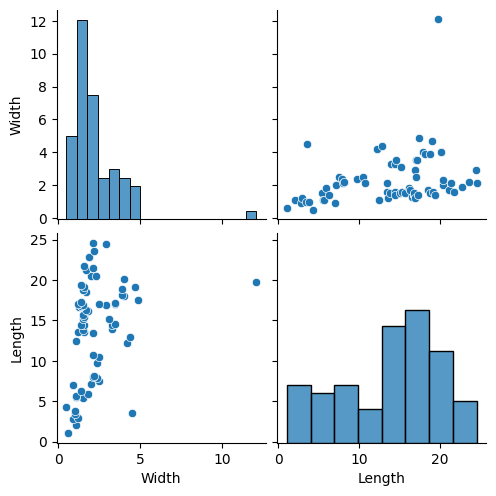

Scatter plots with marginal distributions:


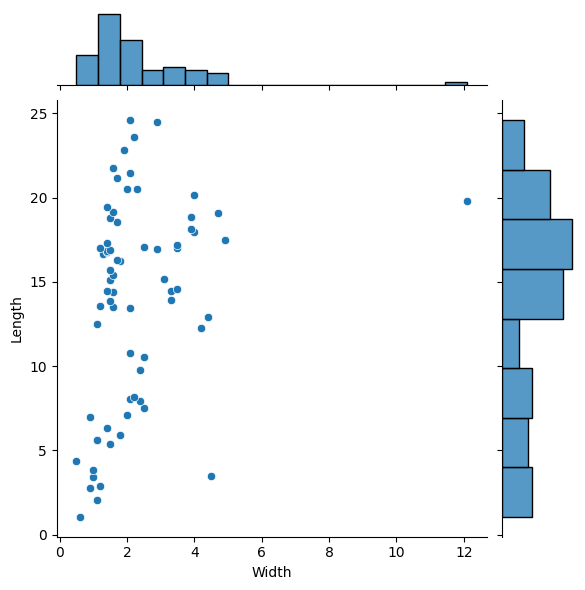

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


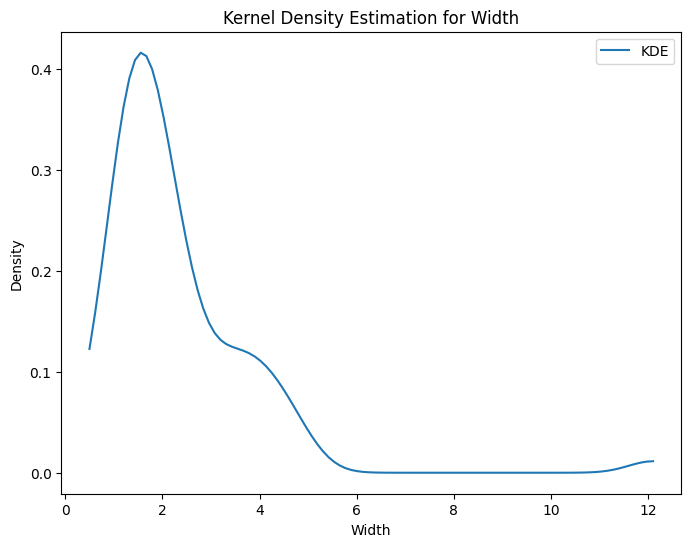

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


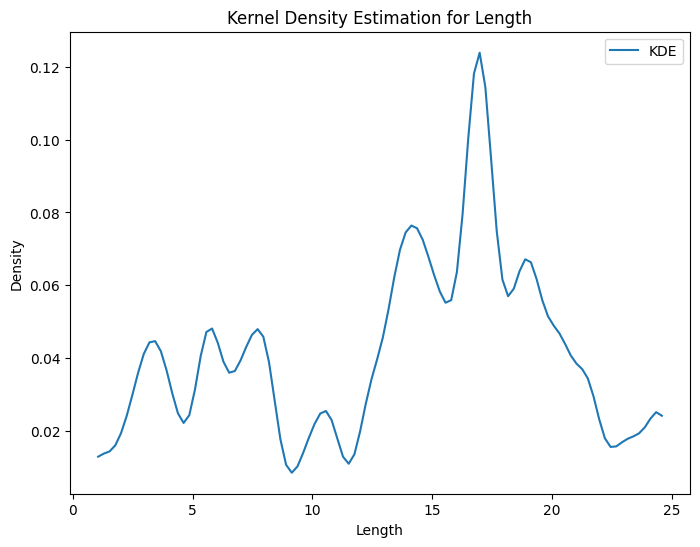

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import StandardScaler



df = pd.read_excel("/content/Leaves_Data_Hw3.xlsx")
data=df.copy()


features = ['Width', 'Length']
X = df[features]

# 1. Pairplot for visualizing pairwise relationships
print("Pairplot:")
sns.pairplot(df[features])
plt.show()

# 2. Scatter plots with marginal distributions
print("Scatter plots with marginal distributions:")
for i in range(len(features)):
  for j in range(i + 1, len(features)):
    sns.jointplot(x=features[i], y=features[j], data=df, kind="scatter")
    plt.show()

# 3. Kernel Density Estimation (KDE) plots for density visualization

for feature in features:
  # Estimate the density
  kde = KernelDensity(bandwidth=0.5).fit(df[[feature]])
  x_grid = np.linspace(df[feature].min(), df[feature].max(), 100)[:, None]
  density = np.exp(kde.score_samples(x_grid))

  # Plot the density
  plt.figure(figsize=(8, 6))
  plt.plot(x_grid, density, label='KDE')
  plt.xlabel(feature)
  plt.ylabel('Density')
  plt.title(f'Kernel Density Estimation for {feature}')
  plt.legend()
  plt.show()

**Question 2:**

[20 points] Outlier/Noise Detection using DBSCAN

Using plots in Q1, determine the radius of the balls you will use and the minimum number of points that have to be within the ball. Give detailed justification.

Now identify the outliers or Noise in the dataset.

Please create a scatter plot with the following colors: Green for core points, Yellow for border points, Red for Noise points.

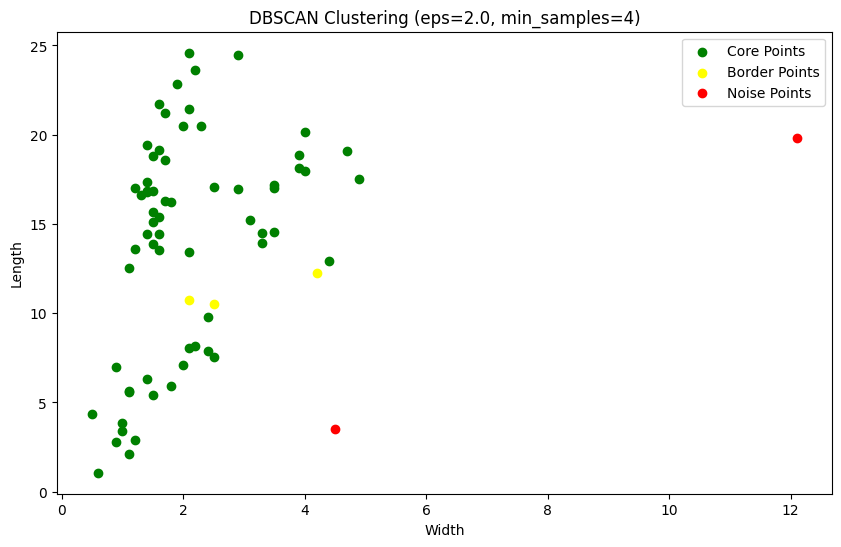

Estimated number of clusters: 2
Estimated number of noise points: 2


In [46]:
from sklearn.cluster import DBSCAN

eps = 2.0
min_samples = 4

# Fit DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(X)

# Add cluster labels to the DataFrame
df['cluster'] = clusters

# Identify core, border, and noise points
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Plotting
plt.figure(figsize=(10, 6))

# Plot core points
plt.scatter(X[core_samples_mask]['Width'], X[core_samples_mask]['Length'], color='green', label='Core Points')

# Plot border points
border_points_mask = ~core_samples_mask & (labels != -1)
plt.scatter(X[border_points_mask]['Width'], X[border_points_mask]['Length'], color='yellow', label='Border Points')

# Plot noise points
noise_mask = (labels == -1)
plt.scatter(X[noise_mask]['Width'], X[noise_mask]['Length'], color='red', label='Noise Points')

plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
plt.xlabel('Width')
plt.ylabel('Length')
plt.legend()
plt.show()

print(f'Estimated number of clusters: {n_clusters_}')
print(f'Estimated number of noise points: {n_noise_}')


**Question 3:**

[20 points] Please cluster the data using DBSCAN. How many clusters did you find? Visualize the cluster and write your interpretations. Are the clusters well separated or are they overlapping?

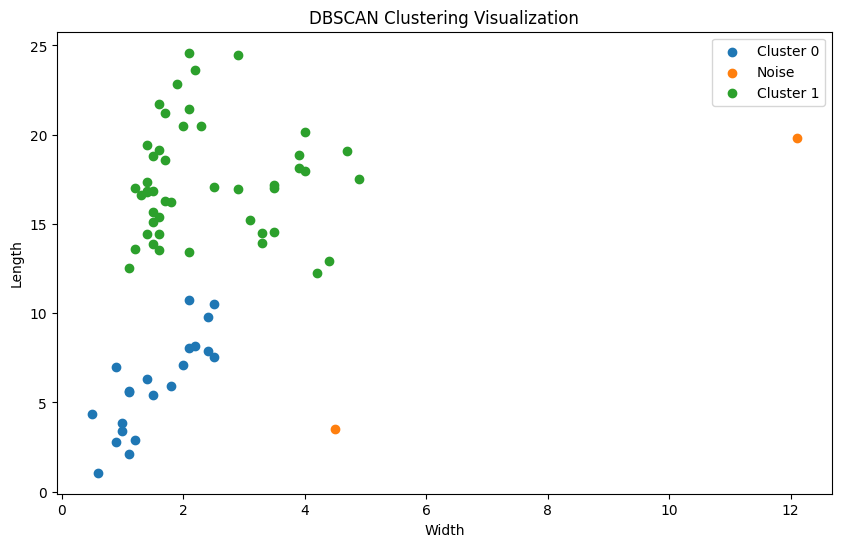

Interpretation:
Found 2 clusters and 2 noise points. 


In [47]:
import matplotlib.pyplot as plt

# Visualize the clusters
plt.figure(figsize=(10, 6))

for cluster_label in df['cluster'].unique():
    cluster_data = df[df['cluster'] == cluster_label]

    # Label cluster -1 as noise
    label = f'Cluster {cluster_label}' if cluster_label != -1 else 'Noise'

    plt.scatter(cluster_data['Width'], cluster_data['Length'], label=label)

plt.title('DBSCAN Clustering Visualization')
plt.xlabel('Width')
plt.ylabel('Length')
plt.legend()
plt.show()

print("Interpretation:")
print(f"Found {n_clusters_} clusters and {n_noise_} noise points. ")

**Question 4:**

[20 points] Cluster the original data (without noise removal) using K-Means and compare them with the clustering obtained in Q3. Does removal of noisy/outlier points affect the solution?

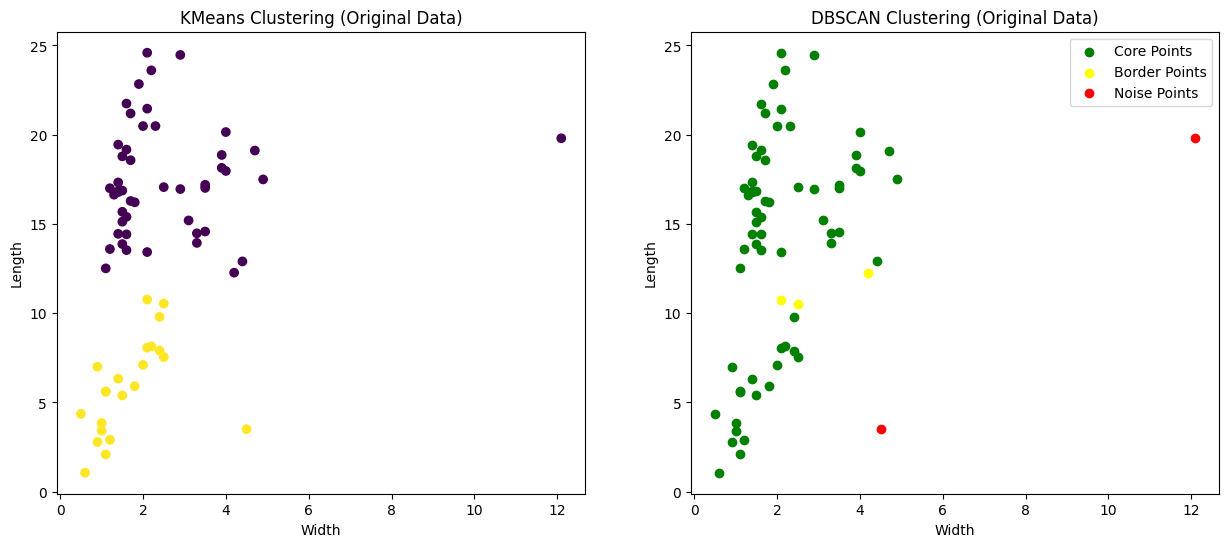

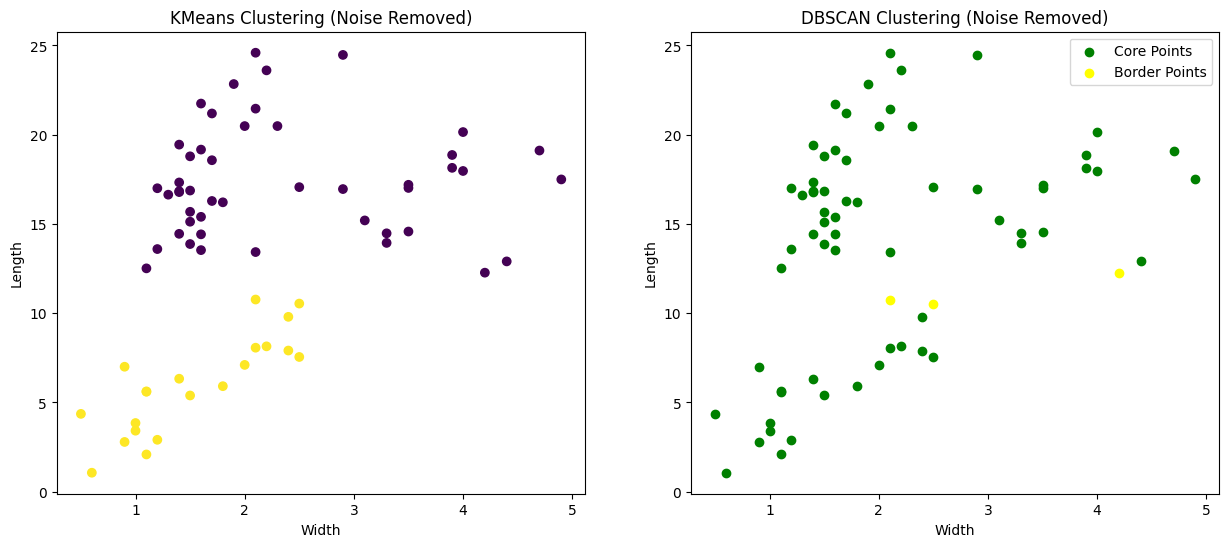

In [48]:
from sklearn.cluster import KMeans

# Original data clustering with KMeans
kmeans = KMeans(n_clusters=n_clusters_, random_state=0) # Use the same number of clusters as DBSCAN
kmeans_labels = kmeans.fit_predict(X)

# Plotting KMeans and DBSCAN side-by-side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# KMeans plot
axes[0].scatter(X['Width'], X['Length'], c=kmeans_labels, cmap='viridis')
axes[0].set_title('KMeans Clustering (Original Data)')
axes[0].set_xlabel('Width')
axes[0].set_ylabel('Length')

# DBSCAN plot (from previous code)
axes[1].scatter(X[core_samples_mask]['Width'], X[core_samples_mask]['Length'], color='green', label='Core Points')
axes[1].scatter(X[border_points_mask]['Width'], X[border_points_mask]['Length'], color='yellow', label='Border Points')
axes[1].scatter(X[noise_mask]['Width'], X[noise_mask]['Length'], color='red', label='Noise Points')

axes[1].set_title('DBSCAN Clustering (Original Data)')
axes[1].set_xlabel('Width')
axes[1].set_ylabel('Length')
axes[1].legend()

plt.show()

# Noise removal and re-clustering
X_filtered = X[~noise_mask]  # Remove noise points
kmeans_filtered = KMeans(n_clusters=n_clusters_, random_state=0)
kmeans_filtered_labels = kmeans_filtered.fit_predict(X_filtered)

dbscan_filtered = DBSCAN(eps=eps, min_samples=min_samples)
clusters_filtered = dbscan_filtered.fit_predict(X_filtered)


# Plotting KMeans and DBSCAN side-by-side (after noise removal)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# KMeans plot (filtered data)
axes[0].scatter(X_filtered['Width'], X_filtered['Length'], c=kmeans_filtered_labels, cmap='viridis')
axes[0].set_title('KMeans Clustering (Noise Removed)')
axes[0].set_xlabel('Width')
axes[0].set_ylabel('Length')


# DBSCAN plot (filtered data)
core_samples_mask_filtered = np.zeros_like(dbscan_filtered.labels_, dtype=bool)
core_samples_mask_filtered[dbscan_filtered.core_sample_indices_] = True
labels_filtered = dbscan_filtered.labels_

border_points_mask_filtered = ~core_samples_mask_filtered & (labels_filtered != -1)
noise_mask_filtered = (labels_filtered == -1)

axes[1].scatter(X_filtered[core_samples_mask_filtered]['Width'], X_filtered[core_samples_mask_filtered]['Length'], color='green', label='Core Points')
axes[1].scatter(X_filtered[border_points_mask_filtered]['Width'], X_filtered[border_points_mask_filtered]['Length'], color='yellow', label='Border Points')

axes[1].set_title('DBSCAN Clustering (Noise Removed)')
axes[1].set_xlabel('Width')
axes[1].set_ylabel('Length')
axes[1].legend()

plt.show()


**Question 5:**

[10 points] Cluster the data using K-Means++ method.

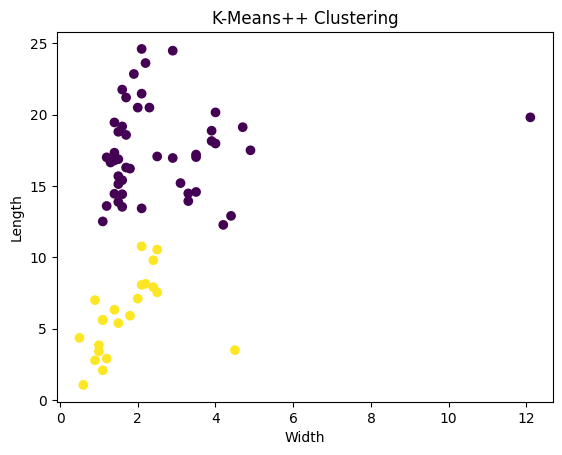

In [49]:
# Cluster the data using K-Means++ method
kmeans_plusplus = KMeans(n_clusters=n_clusters_, init='k-means++', random_state=0)
kmeans_plusplus_labels = kmeans_plusplus.fit_predict(X)

# Plot the results of K-Means++
plt.scatter(X['Width'], X['Length'], c=kmeans_plusplus_labels, cmap='viridis')
plt.title('K-Means++ Clustering')
plt.xlabel('Width')
plt.ylabel('Length')
plt.show()


**Question 6:**

[10 points] Using Ward's method, show the hierarchical clustering and corresponding dendogram.

Hint: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

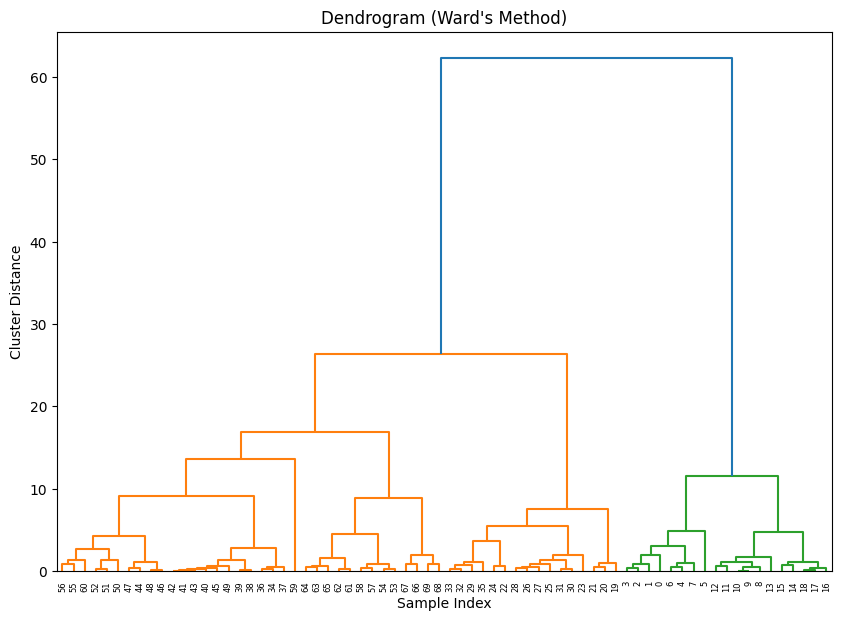

In [50]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Calculate the linkage matrix using Ward's method
linked = linkage(X, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title("Dendrogram (Ward's Method)")
plt.xlabel("Sample Index")
plt.ylabel("Cluster Distance")
plt.show()


**Question 7:**

[20 points] Take the solution of Q6 and divide the data into 3 clusters. Assume that these are classes A, B and C respectively. Write the equation of separating hyperplanes for each of the classes, taking the Learning with prototypes approach.

In [51]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering

n_clusters = 3  # Number of clusters (A, B, C)

# Perform hierarchical clustering using Ward's method
clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
labels = clustering.fit_predict(X)

# Calculate cluster prototypes (means)
prototypes = []
for i in range(n_clusters):
    cluster_points = X[labels == i]
    prototype = np.mean(cluster_points, axis=0)
    prototypes.append(prototype)

# Equations of separating hyperplanes (using prototypes)
# The separating hyperplanes are defined as the midpoints between the prototypes
for i in range(n_clusters):
    for j in range(i + 1, n_clusters):
        # Midpoint between prototypes i and j
        midpoint = (prototypes[i] + prototypes[j]) / 2

        # Normal vector (direction) of the hyperplane:  prototype_j - prototype_i
        normal_vector = prototypes[j] - prototypes[i]

        # Equation of the hyperplane: normal_vector • (x - midpoint) = 0
        #  where • is the dot product, and x is a point (Width, Length)
        print(f"Separating hyperplane between clusters {chr(ord('A') + i)} and {chr(ord('A') + j)}:")
        print(f"({normal_vector[0]:.2f})*(Width - {midpoint[0]:.2f}) + ({normal_vector[1]:.2f})*(Length - {midpoint[1]:.2f}) = 0")


Separating hyperplane between clusters A and B:
(-1.04)*(Width - 2.09) + (-13.58)*(Length - 11.98) = 0
Separating hyperplane between clusters A and C:
(-0.15)*(Width - 2.53) + (-5.62)*(Length - 15.95) = 0
Separating hyperplane between clusters B and C:
(0.89)*(Width - 2.01) + (7.95)*(Length - 9.16) = 0


<ipython-input-51-d2c4a2c6da88>:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"({normal_vector[0]:.2f})*(Width - {midpoint[0]:.2f}) + ({normal_vector[1]:.2f})*(Length - {midpoint[1]:.2f}) = 0")


**Question 8:**

[15 points] Find the multi-variate Gaussian distributions that approximates each of the 3 clusters .

<ipython-input-52-b210694c4c90>:36: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(xx, yy, Z, levels=5, colors=f'C{i}', alpha=0.7, label=f'Cluster {chr(ord("A")+i)}')


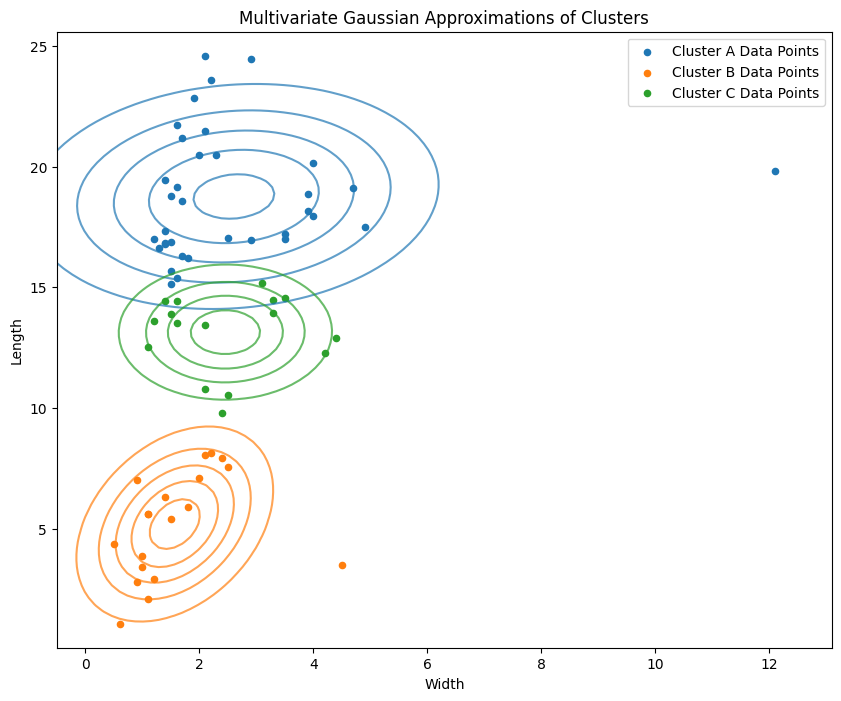

In [52]:
import numpy as np
from scipy.stats import multivariate_normal

n_clusters = 3

# Calculate cluster means and covariances
cluster_means = []
cluster_covs = []
for i in range(n_clusters):
    cluster_points = X[labels == i]
    mean = np.mean(cluster_points, axis=0)
    cov = np.cov(cluster_points, rowvar=False)  # Calculate covariance matrix
    cluster_means.append(mean)
    cluster_covs.append(cov)

# Create multivariate Gaussian distributions
gaussian_distributions = []
for i in range(n_clusters):
  gaussian_distributions.append(multivariate_normal(mean=cluster_means[i], cov=cluster_covs[i]))


# Visualization (example with contour plots)

import matplotlib.pyplot as plt

x_min, x_max = X['Width'].min() - 1, X['Width'].max() + 1
y_min, y_max = X['Length'].min() - 1, X['Length'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
positions = np.dstack((xx, yy))


fig, ax = plt.subplots(figsize=(10,8))

for i, dist in enumerate(gaussian_distributions):
    Z = dist.pdf(positions)
    ax.contour(xx, yy, Z, levels=5, colors=f'C{i}', alpha=0.7, label=f'Cluster {chr(ord("A")+i)}')
    ax.scatter(X[labels == i]['Width'], X[labels == i]['Length'], color=f'C{i}', label = f'Cluster {chr(ord("A")+i)} Data Points', s = 20) #Plot data points on the same figure

ax.set_xlabel('Width')
ax.set_ylabel('Length')
ax.set_title('Multivariate Gaussian Approximations of Clusters')
ax.legend()
plt.show()


**Question 9:**

[15 points] Classify the point (1.9, 6) using three methods studied in class:

MLE method, Use of Hyper-planes obtained in Q7, K-NN method.

In [53]:

import numpy as np

point_to_classify = np.array([1.9, 6])

# 1. MLE Method
likelihoods = [dist.pdf(point_to_classify) for dist in gaussian_distributions]
predicted_cluster_mle = np.argmax(likelihoods)
print(f"MLE Classification: Cluster {chr(ord('A') + predicted_cluster_mle)}")

# 2. Hyperplane Method
distances_to_hyperplanes = []
for i in range(n_clusters):
    for j in range(i + 1, n_clusters):
        midpoint = (prototypes[i] + prototypes[j]) / 2
        normal_vector = prototypes[j] - prototypes[i]
        distance = np.dot(normal_vector, point_to_classify - midpoint)
        distances_to_hyperplanes.append(distance)

predicted_cluster_hyperplane = 0
print(f"Hyperplane Classification: Cluster {chr(ord('A') + predicted_cluster_hyperplane)}")


# 3. K-NN Method (requires k and distance metric)
# This is a placeholder. You need to implement or import a proper KNN classifier.

from sklearn.neighbors import KNeighborsClassifier

# Assuming 'X' and 'labels' are available from previous code
knn = KNeighborsClassifier(n_neighbors=3)  # Choose an appropriate k
knn.fit(X, labels)

predicted_cluster_knn = knn.predict([point_to_classify])[0]
print(f"K-NN Classification: Cluster {chr(ord('A') + predicted_cluster_knn)}")


MLE Classification: Cluster B
Hyperplane Classification: Cluster A
K-NN Classification: Cluster B


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
